단층 퍼셉트론을 통한 AND gate 구현

In [ ]:
def AND_gate(x1, x2):
    w1 = 0.5 #가중치1
    w2 = 0.5 #가중치2
    b = -0.7 #편향값
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
#AND gate에 입력값 넣어보기
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1) #두 개의 입력값이 1인 경우에만 1을 출력

(0, 0, 0, 1)

단층 퍼셉트론을 통한 NAND gate 구현

In [ ]:
def NAND_gate(x1, x2):
    w1 = -0.5 #가중치1
    w2 = -0.5 #가중치2
    b = 0.7 #편향값
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
#NAND gate에 입력값 넣어보기
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1) #AND 게이트와 정확히 반대의 결과가 출력됨(두 개의 입력값이 1인 경우에만 1 출력)

(1, 1, 1, 0)

단층 퍼셉트론을 통한 OR gate 구현

In [ ]:
def OR_gate(x1, x2):
    w1 = 0.6 #가중치1
    w2 = 0.6 #가중치2
    b = -0.5 #편향값
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
#OR gate에 입력값 넣어보기
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1) #두 개의 입력이 모두 0인 경우에만 출력값이 0이 나옴

(0, 1, 1, 1)

다층 퍼셉트론을 통한 XOR gate 구현

In [ ]:
def XOR_gate(x1, x2):
  return AND_gate(NAND_gate(x1, x2),OR_gate(x1,x2))

In [ ]:
#XOR gate에 입력값 넣어보기
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

다층 퍼셉트론 구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

케라스에서 드롭 아웃 모델 추가하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu')) #256개의 뉴런을 가진 완전 연결 층(Dense)을 추가,input_shape 매개변수를 통해 입력 데이터의 형태를 지정, 이 모델은 max_words(10,000) 개의 단어로 구성된 입력을 받음, 활성화 함수로 'relu'를 사용
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))#활성화 함수로 'softmax'를 사용하여 다중 클래스 분류 문제에서 각 클래스에 속할 확률을 출력.


케라스-전처리, Tokenizer(): 토큰화와 정수 인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer() #Tokenizer 객체 생성
train_text = "The earth is an awesome place live" #train_text 변수에 문자열 저장

# 단어 집합 생성-> 토큰화하고 각 단어에 고유한 정수 인덱스 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live" #sub_text 변수열에 문자열 저장
sequences = tokenizer.texts_to_sequences([sub_text])[0] # 이미 생성된 단어 집합을 기반으로 입력 텍스트를 정수 시퀀스로 변환

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


케라스-전처리, pad_sequence(): 모든 샘플의 길이를 동일하게 맞추어줌

In [ ]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre') #첫번째 인자: 패딩을 진행할 데이터 maxlen: 정규화할 길이 padding: 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

케라스-모델링

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() #층을 구성
model.add(Dense(8, input_dim=4, activation='relu')) #은닉층
model.add(Dense(1, activation='sigmoid')) # 출력층

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 40        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


케라스-컴파일

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #입력 텍스트의 각 단어를 고정된 크기의 벡터로 변환
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid')) #시그모이드 활성화 함수를 사용하여 이진 분류 문제에 대한 확률을 출력
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) #optimizer로 'rmsprop'를 사용, RMSprop 옵티마이저를 선택.loss로 'binary_crossentropy'를 사용하여 이진 분류 문제에 대한 손실을 정의.metrics로 'acc'를 사용하여 정확도를 모니터링

케라스의 함수형 API(Sequential API와의 차이 알아보기)

1. Sequential API로 만든 모델

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax')) #입력 차원 4, 출력 차원3, 활성화 함수는 소프트맥스 함수 사용

2-1. Functional API로 FFNN 만들기

In [4]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,)) #10개의 입력층 정의
x = Dense(8, activation="relu")(inputs) #8개의 뉴런과 ReLU 활성화 함수를 가진 첫 번째 은닉층 정의, input을 입력으로 받음
x = Dense(4, activation="relu")(x) #4개의 뉴런과 ReLU 활성화 함수를 가진 두 번째 은닉층 정의, input을 x로 받음
x = Dense(1, activation="linear")(x) #1개의 뉴런과 선형 활성화 함수를 가진 출력층 정의, input을 x로 받음
model = Model(inputs, x) #입력과 출력을 지정하여 모델 정의
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) #옵티마이저로 'rmsprop'을 사용하고, 손실 함수로 'categorical_crossentropy'를 사용, 모델의 평가 지표로 'accuracy'를 설정
# model.fit(data, labels) 실제 데이터를 로드하고 모델을 학습시키는 부분

2-2 Functional API로 선형 회귀 만들기

In [5]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,)) #1개의 입력층 정의
output = Dense(1, activation='linear')(inputs) #1개의 뉴런과 선형 활성화 함수를 가진 출력층 정의, input을 x로 받음
linear_model = Model(inputs, output) #입력과 출력을 지정하여 모델 정의

sgd = optimizers.SGD(lr=0.01) #확률적 경사 하강법(SGD) 옵티마이저를 정의, 학습률(learning rate)은 0.01로 설정

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse']) #옵티마이저로 SGD를 사용, 손실 함수로 MSE를 사용하며 최소화되어야하는 대상
linear_model.fit(X, y, epochs=300) #에포크 수를 300으로 설정하여 모델을 학습

Epoch 1/300
1/1 [==============================] - 1s 735ms/step - loss: 2634.0308 - mse: 2634.0308
Epoch 2/300
1/1 [==============================] - 0s 20ms/step - loss: 325.0948 - mse: 325.0948
Epoch 3/300
1/1 [==============================] - 0s 18ms/step - loss: 40.9971 - mse: 40.9971
Epoch 4/300
1/1 [==============================] - 0s 23ms/step - loss: 6.0403 - mse: 6.0403
Epoch 5/300
1/1 [==============================] - 0s 22ms/step - loss: 1.7387 - mse: 1.7387
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 1.2088 - mse: 1.2088
Epoch 7/300
1/1 [==============================] - 0s 18ms/step - loss: 1.1431 - mse: 1.1431
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1345 - mse: 1.1345
Epoch 9/300
1/1 [==============================] - 0s 13ms/step - loss: 1.1329 - mse: 1.1329
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1322 - mse: 1.1322
Epoch 11/300
1/1 [==============================] - 0s 1

02-3 Functional API로 로지스틱 회귀 만들기

In [6]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,)) #3개의 입력층 정의
output = Dense(1, activation='sigmoid')(inputs) #1개의 뉴런과 시그모이드 함수를 활성화 함수로 가진 출력층 정의, inputs을 입력으로 받음
logistic_model = Model(inputs, output) #입력과 출력 지정하여 모델 정의

02-4 Functional API로 다중 입력을 받는 모델 만들기

In [7]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output]) #두개의 모델이 합쳐져 하나의 벡터가 됨

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z) #최종적인 모델로, 두 개의 입력 inputA와 inputB를 받고 z 모델로부터 출력을 생성

02-5 Functional API로 RNN 은닉층을 가지는 모델 만들기

In [8]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1)) #모델의 입력을 정의. 이 입력은 시퀀스 길이가 50이고 각 시점마다 1개의 특성을 가진 시퀀스 데이터를 받음
lstm_layer = LSTM(10)(inputs) # LSTM 레이어를 정의. 10개의 LSTM 뉴런을 사용하고, 입력으로부터 시퀀스 정보를 추출
x = Dense(10, activation='relu')(lstm_layer) #LSTM 레이어의 출력을 입력으로 받는 밀집(Dense) 레이어를 정의
output = Dense(1, activation='sigmoid')(x) #1개의 뉴런과 시그모이드 활성화 함수를 사용하는 출력층 정의

model = Model(inputs=inputs, outputs=output) #입력과 출력을 지정하여 모델 정의

다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

케라스의 texts_to_matrix() 이해하기

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts) #텍스트 데이터에 대해서 정수 인코딩
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [11]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [12]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary')) #해당 단어가 존재하는지만 관심을 가지고 해당 단어가 몇 개였는지는 무시

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [13]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [15]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력,  각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [16]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

In [17]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [18]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [19]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [20]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [21]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [22]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [23]:
data = pd.DataFrame(newsdata.data, columns = ['email']) #data로부터 데이터프레임을 생성하고, target 열을 추가한 뒤에 상위 5개의 행을 출력
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [24]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


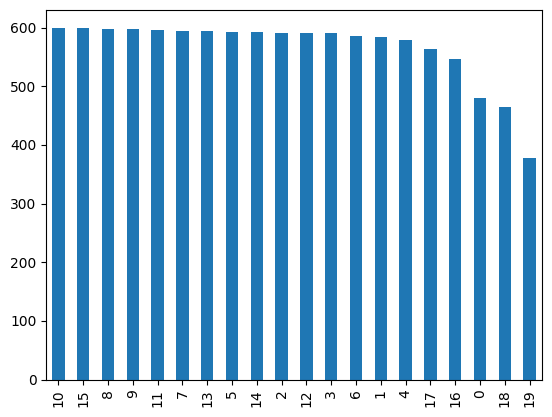

In [25]:
data['target'].value_counts().plot(kind='bar'); #레이블 값의 분포를 시각화

In [26]:
print(data.groupby('target').size().reset_index(name='count')) #각 레이블이 몇 개 있는지 구체적인 수치로 확인

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [27]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) #훈련 데이터와 테스트 데이터의 본문과 레이블을 각각 저장
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [28]:
vocab_size = 10000
num_classes = 20

In [29]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

In [30]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [31]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [32]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential() #Sequential 모델을 초기화
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu')) #첫 번째 레이어는 256개의 뉴런을 가지며, 입력 데이터의 크기인 vocab_size를 입력으로 받고, 활성화 함수로는 ReLU를 사용
    model.add(Dropout(0.5)) #50%의 드롭아웃 비율을 사용
    model.add(Dense(128, activation='relu')) # 128개의 뉴런과 ReLU 활성화 함수
    model.add(Dropout(0.5)) #50%의 드롭아웃 비율을 사용
    model.add(Dense(num_classes, activation='softmax')) #num_classes 개의 뉴런을 가지며, 다중 클래스 분류 문제를 다루기 위해 softmax 활성화 함수를 사용

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #손실 함수로는 'categorical_crossentropy'를, 옵티마이저로는 'adam'을 사용하며, 평가 지표로 'accuracy'를 설정
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1) #모델을 학습. 주어진 학습 데이터를 사용하고 배치 크기는 128, 에포크는 5로 설정. validation_split을 통해 학습 데이터의 10%를 검증 데이터로 사용
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0) #테스트 데이터에 대한 평가를 수행하고 정확도를 반환
    return score[1]

In [34]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 6s 62ms/step - loss: 2.2756 - accuracy: 0.3468 - val_loss: 0.9502 - val_accuracy: 0.8198
Epoch 2/5
80/80 [==============================] - 8s 103ms/step - loss: 0.8597 - accuracy: 0.7659 - val_loss: 0.4713 - val_accuracy: 0.8869
Epoch 3/5
80/80 [==============================] - 5s 58ms/step - loss: 0.4194 - accuracy: 0.8905 - val_loss: 0.3532 - val_accuracy: 0.9037
Epoch 4/5
80/80 [==============================] - 5s 57ms/step - loss: 0.2595 - accuracy: 0.9350 - val_loss: 0.3258 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 6s 71ms/step - loss: 0.1671 - accuracy: 0.9603 - val_loss: 0.3055 - val_accuracy: 0.9125
binary 모드의 테스트 정확도: 0.8331120610237122
Epoch 1/5
80/80 [==============================] - 6s 62ms/step - loss: 2.7942 - accuracy: 0.2258 - val_loss: 1.7117 - val_accuracy: 0.7023
Epoch 2/5
80/80 [==============================] - 5s 68ms/step - loss: 1.4934 - accuracy: 0.6161 - val_loss: 0.7266 - v